In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append("../")
import config


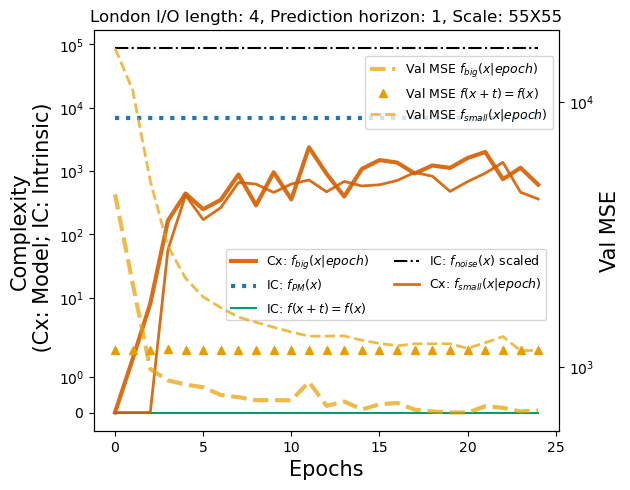

In [150]:
import matplotlib.pyplot as plt




for csr_type in ['CSR_GB_sum_y_exceeding_r_x_max']:
    for city in config.city_list_def:
        
        df = pd.read_csv("epoch_experiments_results/epoch_experiment_big_model.csv")
        df = df.fillna(df.mean())
        # print (df.head())

        x = df["epoch"].tolist()
        val_mse = df["val_loss"].tolist()
        val_non_zero_mse = df["val_non_zero_mse"].tolist()
        val_mse = df["val_loss"].tolist()
        val_mae = (df["val_loss"] ** 0.5).tolist()

        nm_non_zero = df["naive-model-non-zero"].tolist()
        nm_mse = df["naive-model-mse"].tolist()
        nm_mae = (df["naive-model-mse"] ** 0.5).tolist()
    
        cx_MP = (df[csr_type.replace("_GB_", "_MP_")]/3000).tolist()
        cx_PM = (df[csr_type.replace("_GB_", "_PM_")]/3000).tolist()
        cx_NM = (df[csr_type.replace("_GB_", "_NM_")]/3000).tolist()
        cx_GB = (df[csr_type.replace("_GB_", "_GB_")]/3000).tolist()


        # Since GB, PM, and NM are computed only every 5 epochs using 3K points
        # For faster computation, we simply use the mean of all those values and make
        # a single horizontal line; otherwise there is a tiny jenk every 5 epochs 
        # which is confusing for the viewer. Remember that GB, PM, NM are deterministic
        # values and does not change during epochs; well GB is not deterministic
        # but is almost the same (extremely high values)
        mean_cx_PM = np.mean(cx_PM)
        cx_PM = np.random.rand(len(x))*0 + mean_cx_PM
        
        mean_cx_NM = np.mean(cx_NM)
        cx_NM = np.random.rand(len(x))*0 + mean_cx_NM        
        
        mean_cx_GB = np.mean(cx_GB)
        cx_GB = np.random.rand(len(x))*0 + mean_cx_GB        
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()


        
        ax1.plot(x, cx_MP, label = r"Cx: $f_{big}(x|epoch)$", alpha=0.9, color="#D55E00", linewidth=3)
        ax1.plot(x, cx_PM, ':', label = r"IC: $f_{PM}(x)$", linewidth=3)
        ax1.plot(x, cx_NM, '-', label = r"IC: $f(x+t) = f(x)$", color="#009E73")
        ax1.plot(x, cx_GB, '-.', label = r"IC: $f_{noise}(x)$ scaled", color="#000000")

        ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE $f_{big}(x|epoch)$", color="#E69F00", linewidth=3, alpha=0.7)
        ax2.plot(x, np.array(nm_mse), '^',label = r"Val MSE $f(x+t)=f(x)$", color="#E69F00")
        
        ############## Smaller model same thing
        df = pd.read_csv("epoch_experiments_results/epoch-experiment-smaller-model.csv")
        df = df.fillna(df.mean())
        # print (df.head())

        x = df["epoch"].tolist()
        val_mse = df["val_loss"].tolist()
        val_non_zero_mse = df["val_non_zero_mse"].tolist()
        val_mse = df["val_loss"].tolist()
        val_mae = (df["val_loss"] ** 0.5).tolist()

        nm_non_zero = df["naive-model-non-zero"].tolist()
        nm_mse = df["naive-model-mse"].tolist()
        nm_mae = (df["naive-model-mse"] ** 0.5).tolist()
    
        cx_MP = (df[csr_type.replace("_GB_", "_MP_")]/3000).tolist()
        cx_PM = (df[csr_type.replace("_GB_", "_PM_")]/3000).tolist()
        cx_NM = (df[csr_type.replace("_GB_", "_NM_")]/3000).tolist()
        cx_GB = (df[csr_type.replace("_GB_", "_GB_")]/3000).tolist()

        # Since GB, PM, and NM are computed only every 5 epochs using 3K points
        # For faster computation, we simply use the mean of all those values and make
        # a single horizontal line; otherwise there is a tiny jenk every 5 epochs 
        # which is confusing for the viewer. Remember that GB, PM, NM are deterministic
        # values and does not change during epochs
        mean_cx_PM = np.mean(cx_PM)
        cx_PM = np.random.rand(len(x))*0 + mean_cx_PM
        
        mean_cx_NM = np.mean(cx_NM)
        cx_NM = np.random.rand(len(x))*0 + mean_cx_NM        
        
        mean_cx_GB = np.mean(cx_GB)
        cx_GB = np.random.rand(len(x))*0 + mean_cx_GB               

        ax1.plot(x, cx_MP, label = r"Cx: $f_{small}(x|epoch)$", alpha=0.9, color="#D55E00", linewidth=2)

        ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE $f_{small}(x|epoch)$", color="#E69F00", linewidth=2, alpha=0.7)
          

ax1.set_xlabel('Epochs', fontsize=15)
ax1.set_ylabel('Complexity\n (Cx: Model; IC: Intrinsic)', fontsize=15)
ax2.set_ylabel('Val MSE', fontsize=15)        
ax1.set_yscale("symlog")
ax2.set_yscale("symlog")

ax2.legend(fontsize=9, bbox_to_anchor=(0.5, 0.45, 0.5, 0.5)) # loc=1)
ax1.legend( fontsize=9, ncols=2,  bbox_to_anchor=(0.27, 0.26, 0.5, 0.5))

# plt.xlabel("Epochs", fontsize=15)
# plt.plot(x, val_mse, label = "val_mse")
# plt.legend(fontsize=9, bbox_to_anchor=(0.5, 0.1, 0.5, 0.5))
# plt.ylim(-1, 1*10**5)
# plt.yscale('symlog')
# plt.gca().set_aspect(3.5)
plt.tight_layout()
plt.title(city + " I/O length: 4, Prediction horizon: 1, Scale: 55X55")
plt.savefig("across_epoch.png", dpi=600)
plt.show()

            


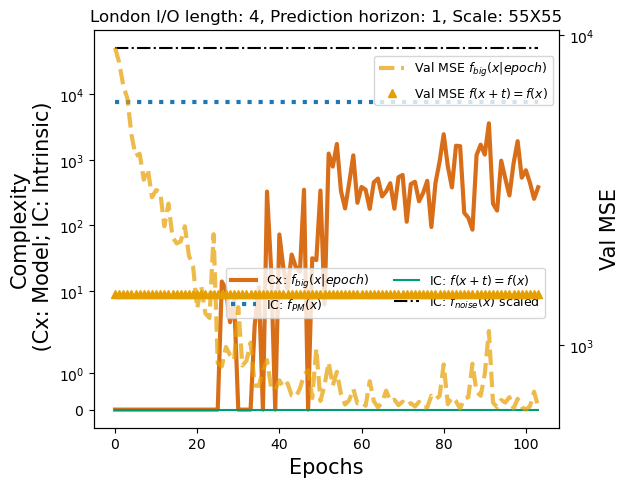

In [162]:
import matplotlib.pyplot as plt




for csr_type in ['CSR_GB_sum_y_exceeding_r_x_max']:
    for city in config.city_list_def:
        
        df = pd.read_csv("batch_experiments_results/val_csv_london-4-1-55-.csv")
        df = df.fillna(df.mean())
        # print (df.head())

        x = df["epoch"].tolist()
        val_mse = df["val_loss"].tolist()
        val_non_zero_mse = df["val_non_zero_mse"].tolist()
        val_mse = df["val_loss"].tolist()
        val_mae = (df["val_loss"] ** 0.5).tolist()

        nm_non_zero = df["naive-model-non-zero"].tolist()
        nm_mse = df["naive-model-mse"].tolist()
        nm_mae = (df["naive-model-mse"] ** 0.5).tolist()
    
        cx_MP = (df[csr_type.replace("_GB_", "_MP_")]/200).tolist()
        cx_PM = (df[csr_type.replace("_GB_", "_PM_")]/200).tolist()
        cx_NM = (df[csr_type.replace("_GB_", "_NM_")]/200).tolist()
        cx_GB = (df[csr_type.replace("_GB_", "_GB_")]/200).tolist()


        # Since GB, PM, and NM are computed only every 5 epochs using 3K points
        # For faster computation, we simply use the mean of all those values and make
        # a single horizontal line; otherwise there is a tiny jenk every 5 epochs 
        # which is confusing for the viewer. Remember that GB, PM, NM are deterministic
        # values and does not change during epochs; well GB is not deterministic
        # but is almost the same (extremely high values)
        mean_cx_PM = np.mean(cx_PM)
        cx_PM = np.random.rand(len(x))*0 + mean_cx_PM
        
        mean_cx_NM = np.mean(cx_NM)
        cx_NM = np.random.rand(len(x))*0 + mean_cx_NM        
        
        mean_cx_GB = np.mean(cx_GB)
        cx_GB = np.random.rand(len(x))*0 + mean_cx_GB   
        
        mean_nm_mse = np.mean(nm_mse)
        nm_mse = np.random.rand(len(x))*0 + mean_nm_mse
        
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()


        
        ax1.plot(x, cx_MP, label = r"Cx: $f_{big}(x|epoch)$", alpha=0.9, color="#D55E00", linewidth=3)
        ax1.plot(x, cx_PM, ':', label = r"IC: $f_{PM}(x)$", linewidth=3)
        ax1.plot(x, cx_NM, '-', label = r"IC: $f(x+t) = f(x)$", color="#009E73")
        ax1.plot(x, cx_GB, '-.', label = r"IC: $f_{noise}(x)$ scaled", color="#000000")

        ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE $f_{big}(x|epoch)$", color="#E69F00", linewidth=3, alpha=0.7)
        ax2.plot(x, np.array(nm_mse), '^',label = r"Val MSE $f(x+t)=f(x)$", color="#E69F00")
        
          

ax1.set_xlabel('Epochs', fontsize=15)
ax1.set_ylabel('Complexity\n (Cx: Model; IC: Intrinsic)', fontsize=15)
ax2.set_ylabel('Val MSE', fontsize=15)        
ax1.set_yscale("symlog")
ax2.set_yscale("symlog")

ax2.legend(fontsize=9, bbox_to_anchor=(0.5, 0.45, 0.5, 0.5)) # loc=1)
ax1.legend( fontsize=9, ncols=2,  bbox_to_anchor=(0.27, 0.26, 0.5, 0.5))

# plt.xlabel("Epochs", fontsize=15)
# plt.plot(x, val_mse, label = "val_mse")
# plt.legend(fontsize=9, bbox_to_anchor=(0.5, 0.1, 0.5, 0.5))
# plt.ylim(-1, 1*10**5)
# plt.yscale('symlog')
# plt.gca().set_aspect(3.5)
plt.tight_layout()
plt.title(city + " I/O length: 4, Prediction horizon: 1, Scale: 55X55")
plt.savefig("across_epoch.png", dpi=600)
plt.show()

            


In [161]:
cx_PM

array([7546.26833333, 7546.26833333, 7546.26833333, 7546.26833333,
       7546.26833333, 7546.26833333, 7546.26833333, 7546.26833333,
       7546.26833333, 7546.26833333, 7546.26833333, 7546.26833333,
       7546.26833333, 7546.26833333, 7546.26833333, 7546.26833333,
       7546.26833333, 7546.26833333, 7546.26833333, 7546.26833333,
       7546.26833333, 7546.26833333, 7546.26833333, 7546.26833333,
       7546.26833333, 7546.26833333, 7546.26833333, 7546.26833333,
       7546.26833333, 7546.26833333, 7546.26833333, 7546.26833333,
       7546.26833333, 7546.26833333, 7546.26833333, 7546.26833333,
       7546.26833333, 7546.26833333, 7546.26833333, 7546.26833333,
       7546.26833333, 7546.26833333, 7546.26833333, 7546.26833333,
       7546.26833333, 7546.26833333, 7546.26833333, 7546.26833333,
       7546.26833333, 7546.26833333, 7546.26833333, 7546.26833333,
       7546.26833333, 7546.26833333, 7546.26833333, 7546.26833333,
       7546.26833333, 7546.26833333, 7546.26833333, 7546.26833